<a href="https://colab.research.google.com/github/ManavMoitra/tensorflow-2.3.0/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q tensorflow-gpu==2.3.0
import tensorflow as tf

     |████████████████████████████████| 320.4MB 56kB/s 


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,Input
from tensorflow.keras.models import Model

In [5]:
fashion_mnist=tf.keras.datasets.fashion_mnist

In [6]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
X_train=X_train/255.0
X_test=X_test/255.0

In [8]:
print(X_train.shape)

(60000, 28, 28)


In [9]:
X_train=np.expand_dims(X_train,-1)
X_test=np.expand_dims(X_test,-1)
print(X_train.shape)


(60000, 28, 28, 1)


In [10]:
k=len(set(y_train))

In [11]:
i=Input(shape=X_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(k,activation='softmax')(x)
model=Model(i,x)



In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5160 - accuracy: 0.8098 - val_loss: 0.3891 - val_accuracy: 0.8575
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3553 - accuracy: 0.8661 - val_loss: 0.3402 - val_accuracy: 0.8714
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3062 - accuracy: 0.8857 - val_loss: 0.3044 - val_accuracy: 0.8910
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2727 - accuracy: 0.8978 - val_loss: 0.3073 - val_accuracy: 0.8858
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2482 - accuracy: 0.9064 - val_loss: 0.3162 - val_accuracy: 0.8839
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2287 - accuracy: 0.9125 - val_loss: 0.2984 - val_accuracy: 0.8978
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2124 - accuracy: 0.9189 - val_loss: 0.2889 - val_accuracy:

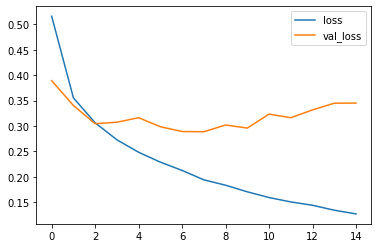

In [15]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

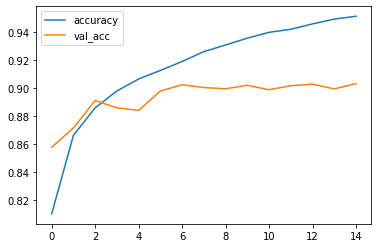

In [18]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [21]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3450 - accuracy: 0.9031


[0.3449578881263733, 0.9031000137329102]

In [22]:
classifications = model.predict(X_test)
print(classifications[0])

[1.7254215e-11 7.5460857e-14 9.5947063e-11 4.9859531e-15 6.6099411e-11
 1.5687130e-09 1.5672124e-12 3.3525598e-08 7.9520944e-14 1.0000000e+00]


In [23]:
print(y_test[0])

9
